<a href="https://colab.research.google.com/github/akikohatsune/onion-domaincustom/blob/main/Custom_onion_domainname.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Runtime > Run all (or Ctrl+F9)**
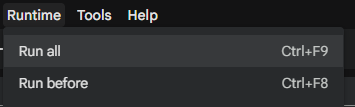

In [ ]:
# @title Step 0: Select CPU Runtime (Recommended)
# @markdown **Important:** For this specific tool (`mkp224o`), using the **CPU** runtime is recommended.
# @markdown GPU sessions on Colab are more likely to be disconnected due to inactivity or resource limits if not fully utilized.
# @markdown
# @markdown **How to switch to CPU:**
# @markdown 1. Click on **Runtime** in the top menu.
# @markdown 2. Select **Change runtime type**.
# @markdown 3. Under **Hardware accelerator**, select **None** (or **CPU**).
# @markdown 4. Click **Save**.

print("Please ensure you have selected CPU runtime for better session stability.")

In [ ]:
# @title Step 1: Install and compile the tool
# @markdown This process takes about 1-2 minutes to install the libraries and compile tool.

!sudo apt update
!sudo apt install gcc libc6-dev libsodium-dev make autoconf -y
!git clone https://github.com/cathugger/mkp224o.git
%cd mkp224o
!./autogen.sh
!./configure
!make

In [ ]:
# @title Step 2: Download htop and fastfetch
# @markdown u can skip this step:)
!wget https://github.com/fastfetch-cli/fastfetch/releases/latest/download/fastfetch-linux-amd64.deb
!sudo apt install ./fastfetch-linux-amd64.deb
!wget http://archive.ubuntu.com/ubuntu/pool/main/h/htop/htop_3.0.5-7build2_amd64.deb
!sudo dpkg -i htop_3.0.5-7build2_amd64.deb

In [ ]:
# @title Step 3: Run tool
# @markdown - Search prefix set to `name` (5 chars) for quick generation (approx. a few minutes).
# @markdown - If you want to try your luck with 6 chars, edit the command below (might take several hours).
# @markdown - **WARNING: Do not attempt more than 6 characters!** (It will take years or several millenniums).
# @markdown - **You can stop when you've had enough to eat**.


# Added -s parameter to print speed statistics
!./mkp224o miku -d keys -s


In [ ]:
# @title Step 4: Download & Setup Instructions
# @markdown After running this cell, `my_onion_keys.zip` will download automatically.
# @markdown ---
# @markdown **Setup Instructions for VPS/Server:**
# @markdown 1. Extract the downloaded zip file. You will see folders named like `<your_prefix>....onion`.
# @markdown 2. Open the folder with your preferred domain. Copy all 3 files inside (`hostname`, `hs_ed25519_secret_key`, `hs_ed25519_public_key`).
# @markdown 3. Paste them into your Tor Hidden Service directory on your VPS (usually `/var/lib/tor/hidden_service/`).
# @markdown 4. Set directory ownership (Linux command):
# @markdown `chown -R debian-tor:debian-tor /var/lib/tor/hidden_service/`
# @markdown 5. Restart Tor:
# @markdown `sudo systemctl restart tor`

import shutil
import os
from google.colab import files

# Check if 'keys' folder exists to avoid errors
if os.path.exists('keys'):
    print("Zipping files...")
    shutil.make_archive('my_onion_keys', 'zip', 'keys')
    print("Downloading...")
    files.download('my_onion_keys.zip')
else:
    print("❌ Error: 'keys' folder not found. Please make sure you ran Step 3 and found a domain first.")
    # thanks  Gemini